In [1]:
%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
sent1 = pd.DataFrame.from_csv('data/features/sentiment_all.csv')
read1 = pd.DataFrame.from_csv('data/features/readability1.csv')
read2 = pd.DataFrame.from_csv('data/features/readability2.csv')

df = sent1.merge(read1, on='post_id').merge(read2, on='post_id')

IOError: File data/features/sentiment_all.csv does not exist

In [4]:
train_classes = pd.DataFrame.from_csv('data/classes/train_classes.txt')
dev_classes = pd.DataFrame.from_csv('data/classes/dev_classes.txt')

In [5]:
train_sentiment = df.merge(train_classes, on='post_id')
test_sentiment = df.merge(dev_classes, on='post_id')

In [10]:
clf = RandomForestClassifier(n_estimators=20, max_depth=10)
#clf = LogisticRegression()

In [11]:
features = ['text_sentiment', 'title_sentiment', 'text_readability', 'title_readability', 'text_smog', 'title_smog']

X_train = train_sentiment[features].as_matrix()
y_train = train_sentiment['class'].as_matrix().astype('float')

X_test = test_sentiment[features].as_matrix()
y_test = test_sentiment['class'].as_matrix().astype('float')

In [12]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [13]:
labels = clf.predict_proba(X_test)

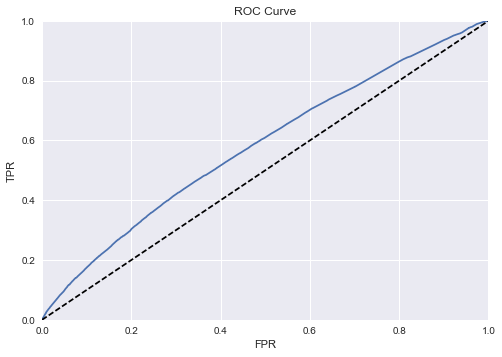

In [14]:
fpr, tpr, thresholds = roc_curve(y_test, labels[:, 1])
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.plot([0, 1], [0, 1], 'k--')

In [15]:
print 'AUC:', roc_auc_score(y_test, labels[:, 1])
print 'Acc:', accuracy_score(y_test, np.argmax(labels, axis=1))

AUC: 0.582067279842
Acc: 0.731890865818
